In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
import matplotlib.pyplot as plt

In [2]:
mouse_file = "data/Mouse_metadata.csv"
mouse_df = pd.read_csv(mouse_file, encoding="ISO-8859-1")
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_file = "data/Study_results.csv"
study_df = pd.read_csv(study_file, encoding="ISO-8859-1")
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
study_df.count
study_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
mouse_df_group = mouse_df.groupby("Mouse ID")

mouse_df_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
study_renamed = study_df.rename(columns={"Mouse ID": "Mouse_ID",
                                                    "Tumor Volume (mm3)": "Tumor_Volume",
                                                    "Metastatic Sites": "Metastatic_Sites"})
mouse_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [7]:
mouse_renamed = mouse_df.rename(columns={"Mouse ID": "Mouse_ID", 
                                         "Drug Regimen": "Drug_Regimen",
                                         "Weight (g)": "Weight(g)"})

drug_names = mouse_renamed.Drug_Regimen.unique()

In [8]:
mouse_study_df=pd.merge(mouse_renamed,study_renamed, on=("Mouse_ID"), how= "outer")
mouse_study_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates
mouse_study_clean = mouse_study_df.drop_duplicates(subset= ('Mouse_ID', 'Timepoint'))

mouse_study_clean

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
null_values = mouse_study_clean.isnull()
row_has_NaN = null_values.any(axis=1)
rows_with_NaN = mouse_study_clean[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [Mouse_ID, Drug_Regimen, Sex, Age_months, Weight(g), Timepoint, Tumor_Volume, Metastatic_Sites]
Index: []


In [35]:
mouse_study_clean.Drug_Regimen.unique()
drug_df = mouse_study_clean.loc[:, ["Drug_Regimen", "Tumor_Volume"]]
drug_df_index = drug_df.set_index('Drug_Regimen')
# mean_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['mean']})).reset_index())
# median_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['median']})).reset_index())
# var_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['var']})).reset_index())
# std_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['std']})).reset_index())
# sem_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['sem']})).reset_index())

# mean_med = pd.merge(mean_df, median_df, on="Drug_Regimen")
# mm_var = pd.merge(mean_med, var_df, on="Drug_Regimen")
# mmv_std = pd.merge(mm_var, std_df, on="Drug_Regimen")
# tumor_summary_df = pd.merge(mmv_std, sem_df, on="Drug_Regimen")

drug_df_index.head()

,Tumor_Volume
Drug_Regimen,
Ramicane,45.000000
Ramicane,38.825898
Ramicane,35.014271
Ramicane,34.223992
Ramicane,32.997729


In [37]:
grouped_drug = drug_df_index.groupby("Drug_Regimen")

In [46]:
# ramicane = mouse_study_df.loc[mouse_study_df['Drug_Regimen'] == 'Ramicane']
# capomulin = mouse_study_df.loc[mouse_study_df['Drug_Regimen'] == 'Capomulin']

vol_mean =  (grouped_drug.Tumor_Volume.mean())
vol_median =  (grouped_drug.Tumor_Volume.median())
vol_var =  (grouped_drug.Tumor_Volume.var())
vol_std =  (grouped_drug.Tumor_Volume.std())
vol_sem = (grouped_drug.Tumor_Volume.sem())

tumor_summary = pd.DataFrame({
                            "Mean": vol_mean,
                            "Median": vol_median,
                            "Variance": vol_var,
                            "Standard Deviation": vol_std,
                            "SEM": vol_sem})

tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [156]:
#PIES AND BARS
# * medGenerate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's 
# `pyplot` that shows the total number of measurements taken for each treatment regimen 
# throughout the course of the study.

drug_counts = mouse_study_clean['Drug_Regimen'].value_counts()
drug_counts = pd.Series(drug_counts, name = "Drug_Regimen")
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug_Regimen, dtype: int64

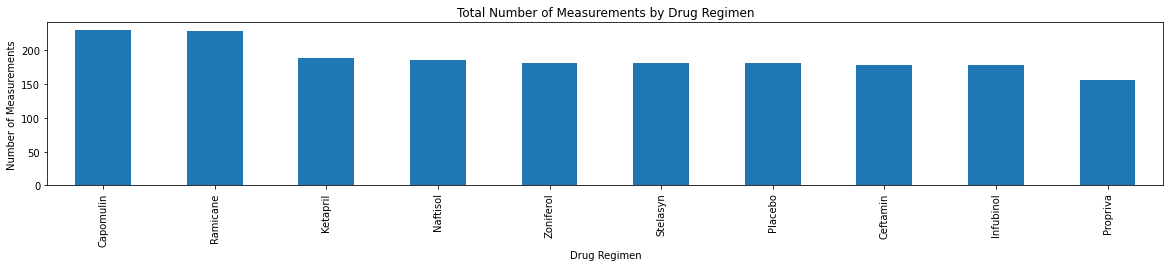

In [157]:
drug_counts.plot(kind="bar", figsize=(20,3))
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

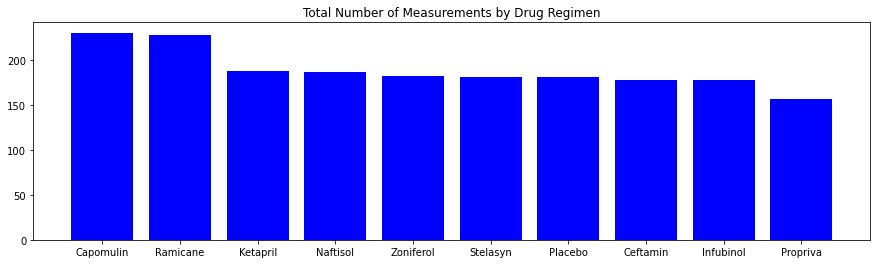

In [162]:
drug_counts_df = pd.DataFrame(drug_counts)

x = drug_counts_df.index.values
y = drug_counts.array

plt.figure(figsize=(15,4))
plt.bar(x,y, color='b',)
plt.title("Total Number of Measurements by Drug Regimen")
plt.show()

Index(['Drug_Regimen'], dtype='object')

<PandasArray>
[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
Length: 10, dtype: int64